# Explain how ML model works

One way to explain how ML model works is SHAP (**SH**apley **A**dditive ex**P**lanation) values, an explainable ML techniques. This method explains the effects of each feature in the model, and allows local and global analysis for the dataset and problem at hand. 

In [1]:
# import library
import shap # library to explain ML model 
import pandas as pd
from sklearn.datasets import fetch_california_housing # dataframe using as example
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

/Users/ranu/Documents/ML-Concept/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Import dataset 

In [2]:
# import California Housing Prices dataset
dataset = fetch_california_housing(as_frame = True)

In [3]:
# split dataframe into two sample
X = dataset['data']
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Analysis

In [4]:
# Modelling part 

## Prepares a default instance of the random forest regressor
model = RandomForestRegressor()
## Fits the model on the data
model.fit(X_train, y_train)

RandomForestRegressor()

In [5]:
# Explicability part

## Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
## Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

ExactExplainer explainer: 4129it [48:03,  1.42it/s]                               


## Evaluation

In [6]:
# Evaluate SHAP values
shap_values = explainer.shap_values(X)

AttributeError: 'ExactExplainer' object has no attribute 'shap_values'

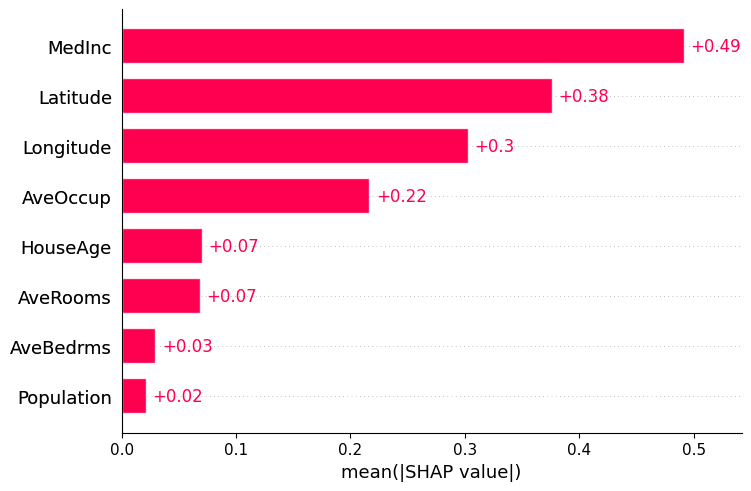

In [7]:
# quantify the proportion of the impact of each features
shap.plots.bar(shap_values)

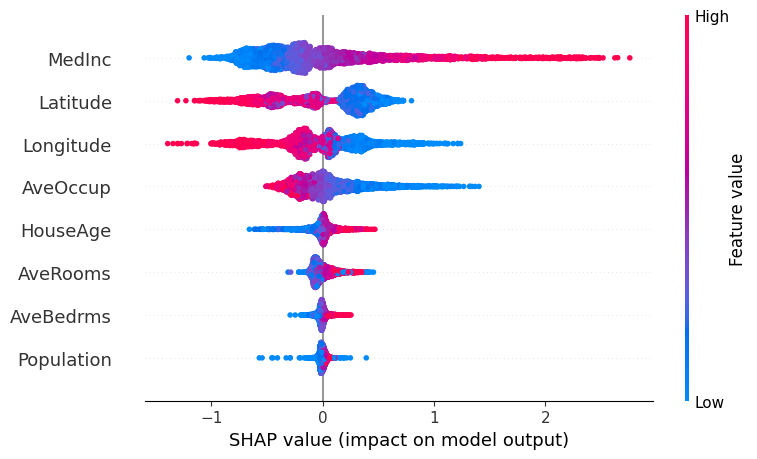

In [8]:
# how higher and lower values of the feature will affect the result
shap.summary_plot(shap_values)

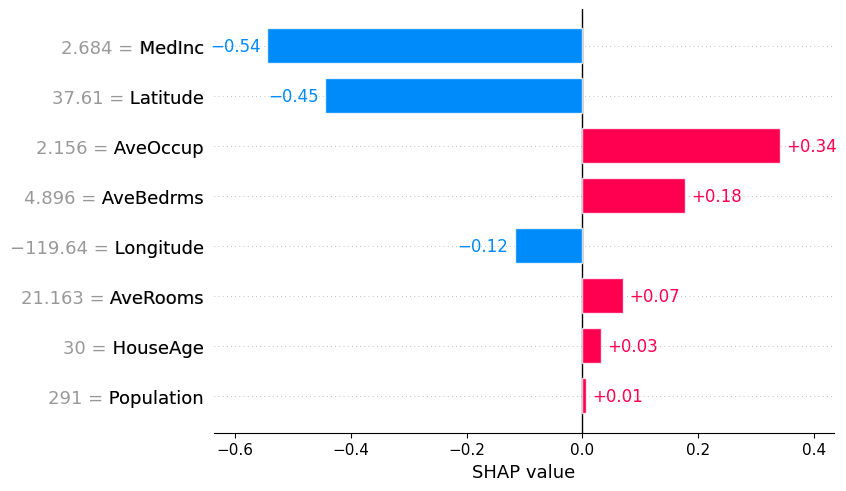

In [9]:
shap.plots.bar(shap_values[0])

In [10]:
# the effect each feature has on the prediction
shap.plots.force(shap_test[0])

NameError: name 'shap_test' is not defined